In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import datetime, time, os
from tensorflow.keras.layers.experimental import preprocessing
    
print('Using TensorFlow version: %s' % tf.__version__)
np.set_printoptions(precision=3, suppress=True)

import datetime, time, os
from datetime import datetime

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score

#!pip install -q git+https://github.com/tensorflow/docs # install first time

RSEED = 42

Using TensorFlow version: 2.8.0


In [93]:
# With this command you can clear any logs from previous runs
# If you want to compare different runs you can skip this cell 
!rm -rf my_logs/

## Loading the processed dataframe (sugarbeet and openweather station data)


In [94]:
df = pd.read_pickle('data_strube/pickles/df_merge_openweatherloc_dev_stage.pkl')
df

,betaine_nir,cry_nir,csy_nir,dm_nir,fieldid,region,invert_nir,mark_nir,ms_comp,obj,...,temp_max_dev_stage_3,temp_min_dev_stage_1,temp_min_dev_stage_2,temp_min_dev_stage_3,wind_deg_dev_stage_1,wind_deg_dev_stage_2,wind_deg_dev_stage_3,wind_speed_dev_stage_1,wind_speed_dev_stage_2,wind_speed_dev_stage_3
0,0.1551,54.60,8.838976,21.5439,Emmeloord,Niederlande,0.1769,5.3553,2.0,23.0,...,13.269393,8.269334,15.895495,10.727693,191.661581,198.396396,214.082446,3.620014,2.097354,3.227082
1,0.1502,51.07,8.493911,21.8552,Emmeloord,Niederlande,0.1539,5.2233,6.0,3.0,...,13.269393,8.269334,15.895495,10.727693,191.661581,198.396396,214.082446,3.620014,2.097354,3.227082
2,0.1370,52.73,8.356650,21.1878,Emmeloord,Niederlande,0.1643,5.3398,2.0,28.0,...,13.269393,8.269334,15.895495,10.727693,191.661581,198.396396,214.082446,3.620014,2.097354,3.227082
3,0.1391,44.33,6.957815,21.1140,Emmeloord,Niederlande,0.1647,5.4185,1.0,33.0,...,13.269393,8.269334,15.895495,10.727693,191.661581,198.396396,214.082446,3.620014,2.097354,3.227082
4,0.1286,50.00,7.835800,20.8531,Emmeloord,Niederlande,0.1615,5.1815,2.0,7.0,...,13.269393,8.269334,15.895495,10.727693,191.661581,198.396396,214.082446,3.620014,2.097354,3.227082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,0.1108,67.87,11.721760,22.7418,Anklam,Norddeutschland,0.0410,5.4709,2.0,13.0,...,8.783659,7.408890,16.858393,7.533511,189.174757,203.333664,220.262158,3.730347,3.072626,3.884738
9650,0.0818,74.47,12.498747,21.7245,Anklam,Norddeutschland,0.0677,4.9409,2.0,17.0,...,8.783659,7.408890,16.858393,7.533511,189.174757,203.333664,220.262158,3.730347,3.072626,3.884738
9651,0.0783,70.93,12.182795,22.1038,Anklam,Norddeutschland,0.0647,4.9280,2.0,18.0,...,8.783659,7.408890,16.858393,7.533511,189.174757,203.333664,220.262158,3.730347,3.072626,3.884738
9652,0.0899,71.13,12.296172,22.2158,Anklam,Norddeutschland,0.0835,4.9289,2.0,8.0,...,8.783659,7.408890,16.858393,7.533511,189.174757,203.333664,220.262158,3.730347,3.072626,3.884738


In [95]:
# convert to string for categorizing
df['seednames_coded'] = df['seednames_coded'].astype(str)
df['pollinator_comp'] = df['pollinator_comp'].astype(str)
df['ms_comp'] = df['ms_comp'].astype(str)
df['otype_comp'] = df['otype_comp'].astype(str)

In [96]:
df.shape

(8768, 43)

In [97]:
# dropping columns 
df.drop(['betaine_nir', 
         'cry_nir', 
         'dm_nir', 
         'invert_nir', 
         'mark_nir', 
         #'sc_nir',
         'csy_nir', 
         'totaln_nir', 
         'obj',  
         'seriesid', 
         'x', 
         'y', 
         'ms_comp',
         'otype_comp', 
         #'pollinator_comp',
         #'seednames_coded',
         'region',
         'station_location',
         'fieldid'
         ], axis=1, inplace=True)
df.columns


Index(['pollinator_comp', 'sc_nir', 'seednames_coded', 'dew_point_dev_stage_1',
       'dew_point_dev_stage_2', 'dew_point_dev_stage_3',
       'humidity_dev_stage_1', 'humidity_dev_stage_2', 'humidity_dev_stage_3',
       'pressure_dev_stage_1', 'pressure_dev_stage_2', 'pressure_dev_stage_3',
       'temp_dev_stage_1', 'temp_dev_stage_2', 'temp_dev_stage_3',
       'temp_max_dev_stage_1', 'temp_max_dev_stage_2', 'temp_max_dev_stage_3',
       'temp_min_dev_stage_1', 'temp_min_dev_stage_2', 'temp_min_dev_stage_3',
       'wind_deg_dev_stage_1', 'wind_deg_dev_stage_2', 'wind_deg_dev_stage_3',
       'wind_speed_dev_stage_1', 'wind_speed_dev_stage_2',
       'wind_speed_dev_stage_3'],
      dtype='object')

In [98]:
df.shape

(8768, 27)

In [99]:
# reset index after drpping columns
df = df.reset_index(drop=True)

#### Creating the pipeline

In [100]:
# creating list for categorical predictors/features 
cat_features = list(df.columns[df.dtypes==object])
cat_features

['pollinator_comp', 'seednames_coded']

In [101]:
# creating list for numerical predictors/features
# since 'sc_nir' is our target variable we will exclude this feature from the list of numerical predictors 
# latitude and longitude are also excluded to avoid location influence on prediction
num_features = [
 'dew_point_dev_stage_1', 
 'dew_point_dev_stage_2',
 'dew_point_dev_stage_3', 
 'humidity_dev_stage_1', 
 'humidity_dev_stage_2',
 'humidity_dev_stage_3', 
 'pressure_dev_stage_1', 
 'pressure_dev_stage_2',
 'pressure_dev_stage_3', 
 'temp_dev_stage_1', 
 'temp_dev_stage_2',
 'temp_dev_stage_3', 
 'temp_max_dev_stage_1', 
 'temp_max_dev_stage_2',
 'temp_max_dev_stage_3', 
 'temp_min_dev_stage_1', 
 'temp_min_dev_stage_2',
 'temp_min_dev_stage_3', 
 'wind_deg_dev_stage_1', 
 'wind_deg_dev_stage_2',
 'wind_deg_dev_stage_3',
 'wind_speed_dev_stage_1',
 'wind_speed_dev_stage_2', 
 'wind_speed_dev_stage_3'
]
num_features

['dew_point_dev_stage_1',
 'dew_point_dev_stage_2',
 'dew_point_dev_stage_3',
 'humidity_dev_stage_1',
 'humidity_dev_stage_2',
 'humidity_dev_stage_3',
 'pressure_dev_stage_1',
 'pressure_dev_stage_2',
 'pressure_dev_stage_3',
 'temp_dev_stage_1',
 'temp_dev_stage_2',
 'temp_dev_stage_3',
 'temp_max_dev_stage_1',
 'temp_max_dev_stage_2',
 'temp_max_dev_stage_3',
 'temp_min_dev_stage_1',
 'temp_min_dev_stage_2',
 'temp_min_dev_stage_3',
 'wind_deg_dev_stage_1',
 'wind_deg_dev_stage_2',
 'wind_deg_dev_stage_3',
 'wind_speed_dev_stage_1',
 'wind_speed_dev_stage_2',
 'wind_speed_dev_stage_3']

In [102]:
# define predictors and target variable
X = df.drop('sc_nir', axis=1)
y = df['sc_nir']
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 8768 observations in our dataset and 26 features
Our target vector has also 8768 values


In [103]:
# split into train and test set (train set: 70%, test set: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED) 

#### Preprocessing Pipeline

In [104]:
# Pipeline for categorical features 
cat_pipeline = Pipeline([
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

In [105]:
# pipeline for numerical features
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

In [106]:
# complete pipeline for numerical features
# apply transformers to numerical pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], sparse_threshold=0)

#### Transform X_train

In [107]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [108]:
X_train_transformed.shape

X_tf_train = tf.convert_to_tensor(X_train_transformed)
y_tf_train = tf.convert_to_tensor(y_train)

X_tf_test = tf.convert_to_tensor(X_test_transformed)
y_tf_test = tf.convert_to_tensor(y_test)


## Training
For training you need a train/val split (hopefully you did a train/test split before (and you should use the same as in your ML project to make results comparable). 

In [109]:
# define dictionary to store results
training_history = {}

# define number of epochs and learning rate decay
N_TRAIN = len(X_train)
N_VAL = 0.2
EPOCHS = 100
BATCH_SIZE = N_TRAIN // 10
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
#     0.001,
#     decay_steps=STEPS_PER_EPOCH*1000,
#     decay_rate=1,
#     staircase=False)

### Build, compile and fit your model


In [110]:
# define path for new directory 
root_logdir = os.path.join(os.curdir, "my_logs")

# define function for creating a new folder for each run
def get_run_logdir():
    now = datetime.now()
    run_id = now.strftime('%Y-%m-%d %H:%M:%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [111]:
# define path where checkpoints should be stored
checkpoint_path = "training_1/ML_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0) # Set verbose != 0 if you want output during training 
# return [list of your callbacks]
def get_callbacks(name):
    return tf.keras.callbacks.TensorBoard(run_logdir+name, histogram_freq=1)

You can implement your callbacks in the `model.fit()` method below.

In [112]:
def model_compile_and_fit(model, name, optimizer=None, max_epochs=EPOCHS):
  
    # model.compile
    model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mse'])
    
    # model.fit
    history = model.fit(X_tf_train, y_train, batch_size = BATCH_SIZE, validation_split=N_VAL, epochs = max_epochs, callbacks=get_callbacks(name))
    
    # return results
    return history

In [113]:
X_train.shape

(6137, 26)

#### Build your model
You can build your model by using `tf.keras.Sequential()` that helps you to sequentially define your different layers from input to output. 

In [114]:
with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1)
    ])

#### Train your model
Train your model by using your `model_compile_and_fit()` function you defined above.

In [115]:
#your_history = model_compile_and_fit(your_model, ....)
with tf.device('/cpu:0'):
    training_history["first_model"] = model_compile_and_fit(model, "first_model")

Epoch 1/100
9/9 [==============================] - 0s 22ms/step - loss: 16.6974 - mse: 281.8776 - val_loss: 16.1320 - val_mse: 263.3601
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 15.6527 - mse: 248.3938 - val_loss: 14.7718 - val_mse: 221.6167
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 13.9325 - mse: 198.2901 - val_loss: 12.3778 - val_mse: 157.7623
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 10.8762 - mse: 125.3443 - val_loss: 8.2104 - val_mse: 75.6866
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 5.8713 - mse: 47.0510 - val_loss: 3.4053 - val_mse: 18.9294
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 3.6546 - mse: 15.8515 - val_loss: 2.7770 - val_mse: 9.3605
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 1.9706 - mse: 5.7466 - val_loss: 1.4849 - val_mse: 3.5488
Epoch 8/100
9/9 [==============================] - 0s 10ms/step -

#### Evaluate your model training
TensorFlow offers now (this was more cumbersome before) a simple history plotter that you can use to plot training histories and see how the model performed on training and validation data set.

In [116]:
training_history

{'first_model': <keras.callbacks.History at 0x28ced8a90>}

In [117]:
# plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.ylim([0, 20])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

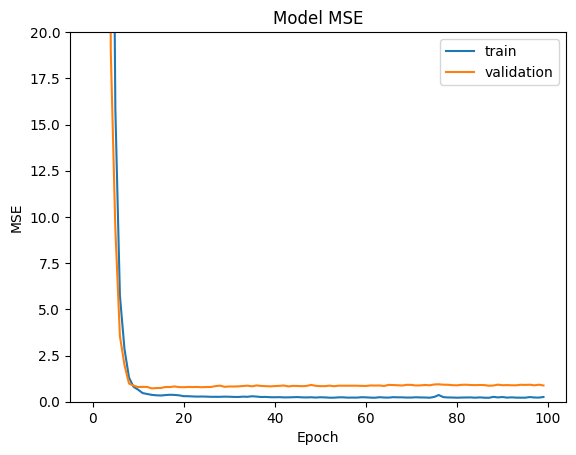

In [118]:
plot_metric(training_history['first_model'])

In [119]:
# plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 5])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

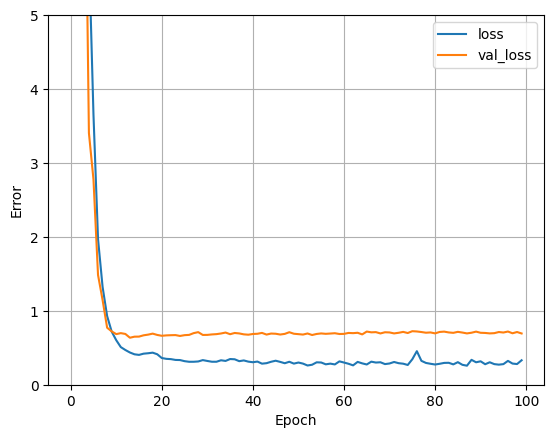

In [120]:
plot_loss(training_history['first_model'])

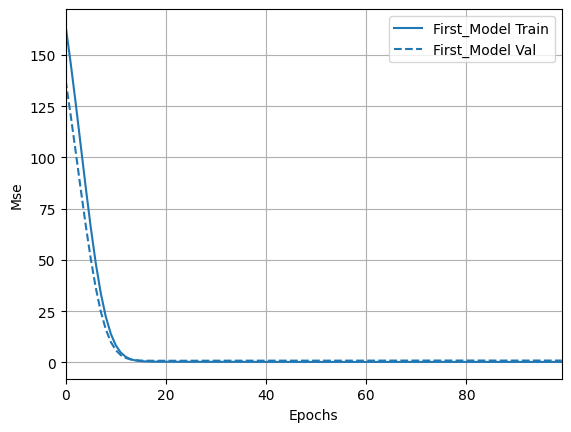

In [121]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [122]:
training_history

{'first_model': <keras.callbacks.History at 0x28ced8a90>}

In [123]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=0)
print(f'Model MSE: {mse}')

2023-03-24 12:49:28.096932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Model MSE: 0.8341906070709229


2023-03-24 12:49:28.674400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


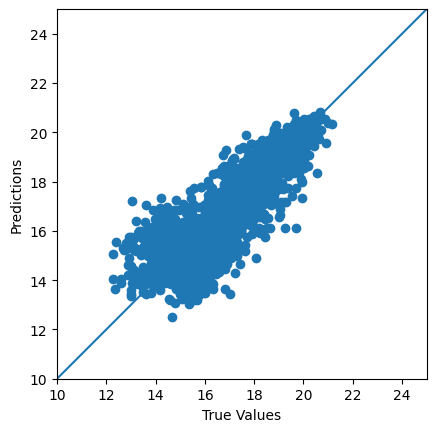

In [124]:
y_pred = model.predict(X_tf_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_tf_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Model tuning

## Second model

In [125]:
#===========#
# Second Model with more nodes
#===========#

with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(1)
    ])  

#your_history = model_compile_and_fit(your_model, ....)
with tf.device('/cpu:0'):
    training_history["second_model"] = model_compile_and_fit(model, "second_model")

Epoch 1/100
9/9 [==============================] - 1s 46ms/step - loss: 15.0633 - mse: 232.4200 - val_loss: 10.6819 - val_mse: 122.4897
Epoch 2/100
9/9 [==============================] - 0s 38ms/step - loss: 7.0671 - mse: 62.4315 - val_loss: 3.9470 - val_mse: 26.6885
Epoch 3/100
9/9 [==============================] - 0s 34ms/step - loss: 3.3538 - mse: 19.6271 - val_loss: 2.1065 - val_mse: 5.9044
Epoch 4/100
9/9 [==============================] - 0s 33ms/step - loss: 1.4701 - mse: 3.2946 - val_loss: 1.2715 - val_mse: 2.1336
Epoch 5/100
9/9 [==============================] - 0s 35ms/step - loss: 1.0839 - mse: 1.6786 - val_loss: 0.7405 - val_mse: 0.8814
Epoch 6/100
9/9 [==============================] - 0s 28ms/step - loss: 0.7370 - mse: 0.8272 - val_loss: 0.8577 - val_mse: 1.1603
Epoch 7/100
9/9 [==============================] - 0s 34ms/step - loss: 0.6376 - mse: 0.6727 - val_loss: 0.7840 - val_mse: 0.9707
Epoch 8/100
9/9 [==============================] - 0s 32ms/step - loss: 0.5524 - 

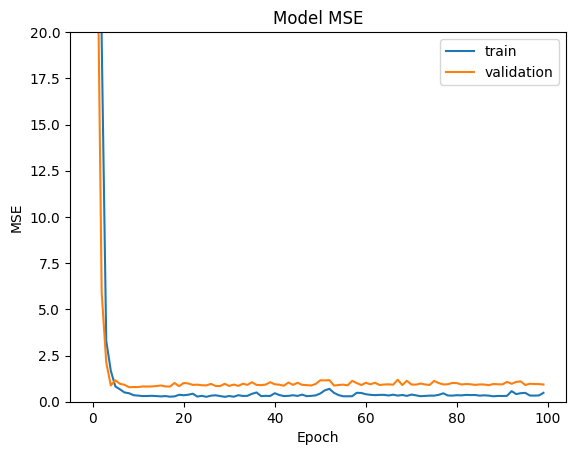

In [126]:
plot_metric(training_history['second_model'])

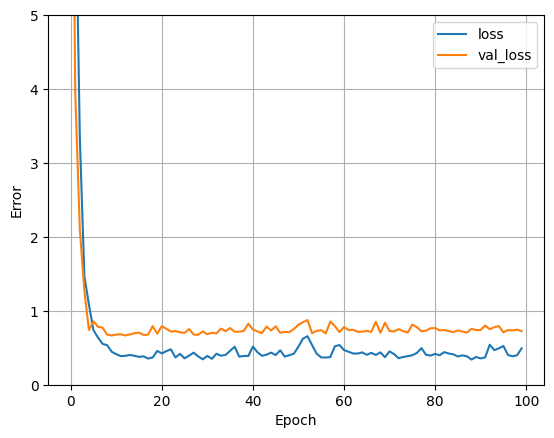

In [127]:
plot_loss(training_history['second_model'])

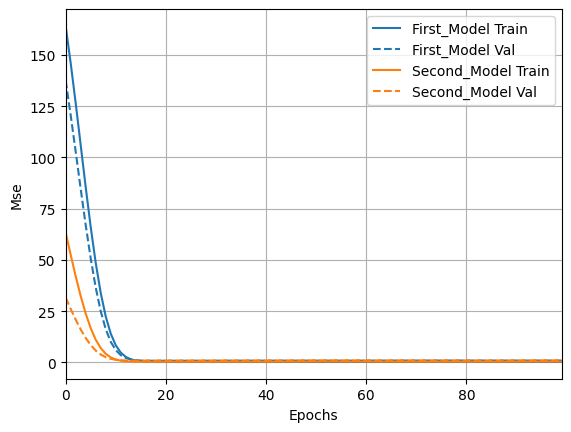

In [128]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [129]:
training_history

{'first_model': <keras.callbacks.History at 0x28ced8a90>,
 'second_model': <keras.callbacks.History at 0x28eab6850>}

In [130]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=2)
print(f'Model MSE: {mse}')

2023-03-24 12:49:56.834194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


83/83 - 1s - loss: 0.7175 - mse: 0.8984 - 571ms/epoch - 7ms/step
Model MSE: 0.8984276652336121


2023-03-24 12:49:57.395540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


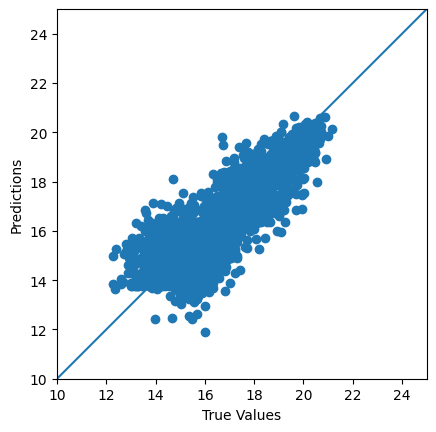

In [131]:
y_pred = model.predict(X_tf_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_tf_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Third model

In [132]:
#===========#
# Third Model with more layers
#===========#

with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(1)
    ])  

#your_history = model_compile_and_fit(your_model, ....)
with tf.device('/cpu:0'):
    training_history["third_model"] = model_compile_and_fit(model, "third_model")

Epoch 1/100
9/9 [==============================] - 2s 139ms/step - loss: 11.9411 - mse: 172.5706 - val_loss: 6.1661 - val_mse: 44.8839
Epoch 2/100
9/9 [==============================] - 1s 130ms/step - loss: 6.1234 - mse: 48.4807 - val_loss: 4.7137 - val_mse: 26.6586
Epoch 3/100
9/9 [==============================] - 1s 131ms/step - loss: 3.1338 - mse: 13.0958 - val_loss: 5.0111 - val_mse: 26.2532
Epoch 4/100
9/9 [==============================] - 1s 134ms/step - loss: 4.5604 - mse: 25.9356 - val_loss: 1.7350 - val_mse: 5.0766
Epoch 5/100
9/9 [==============================] - 1s 125ms/step - loss: 2.3917 - mse: 8.4894 - val_loss: 1.9379 - val_mse: 5.3908
Epoch 6/100
9/9 [==============================] - 1s 126ms/step - loss: 1.6234 - mse: 3.9657 - val_loss: 1.3034 - val_mse: 2.3090
Epoch 7/100
9/9 [==============================] - 1s 128ms/step - loss: 1.2239 - mse: 2.2530 - val_loss: 1.5582 - val_mse: 3.1931
Epoch 8/100
9/9 [==============================] - 1s 126ms/step - loss: 1

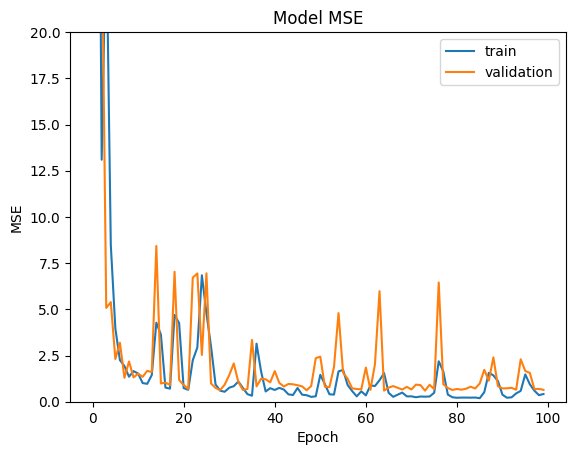

In [133]:
plot_metric(training_history['third_model'])

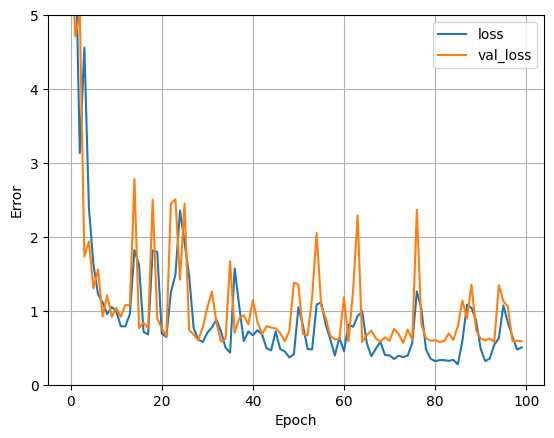

In [134]:
plot_loss(training_history['third_model'])

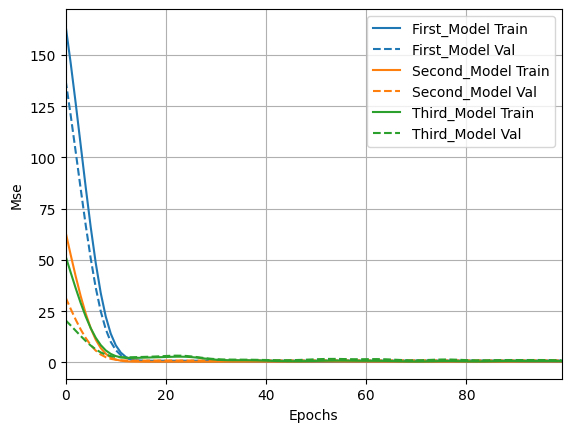

In [135]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [136]:
training_history

{'first_model': <keras.callbacks.History at 0x28ced8a90>,
 'second_model': <keras.callbacks.History at 0x28eab6850>,
 'third_model': <keras.callbacks.History at 0x28f9b89a0>}

In [137]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=2)
print(f'Model MSE: {mse}')

2023-03-24 12:52:03.435531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


83/83 - 1s - loss: 0.5915 - mse: 0.6429 - 1s/epoch - 13ms/step
Model MSE: 0.6428765058517456


2023-03-24 12:52:04.474501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


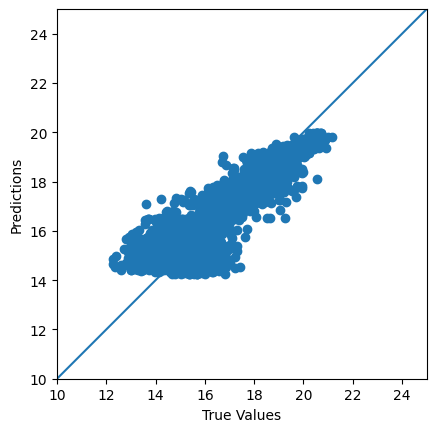

In [138]:
y_pred = model.predict(X_tf_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_tf_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Fourth model

In [139]:
#===========#
# Fourth Model with dropout
#===========#

with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        layers.Dense(1)
    ])  

#your_history = model_compile_and_fit(your_model, ....)
with tf.device('/cpu:0'):
    training_history["fourth_model"] = model_compile_and_fit(model, "fourth_model")

Epoch 1/100
9/9 [==============================] - 1s 62ms/step - loss: 14.8684 - mse: 227.2567 - val_loss: 10.1333 - val_mse: 111.4245
Epoch 2/100
9/9 [==============================] - 0s 41ms/step - loss: 6.3393 - mse: 53.1517 - val_loss: 3.6725 - val_mse: 18.4118
Epoch 3/100
9/9 [==============================] - 0s 41ms/step - loss: 2.7300 - mse: 10.8615 - val_loss: 2.1770 - val_mse: 6.5680
Epoch 4/100
9/9 [==============================] - 0s 50ms/step - loss: 1.7537 - mse: 4.9535 - val_loss: 1.0569 - val_mse: 1.7483
Epoch 5/100
9/9 [==============================] - 0s 44ms/step - loss: 1.3436 - mse: 2.7299 - val_loss: 1.0689 - val_mse: 1.7405
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 1.0550 - mse: 1.7163 - val_loss: 0.8854 - val_mse: 1.1679
Epoch 7/100
9/9 [==============================] - 0s 42ms/step - loss: 1.0184 - mse: 1.6361 - val_loss: 0.7366 - val_mse: 0.8942
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.9417 - 

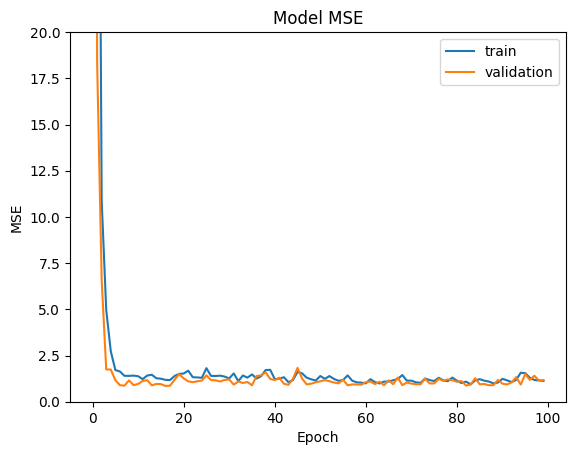

In [140]:
plot_metric(training_history['fourth_model'])

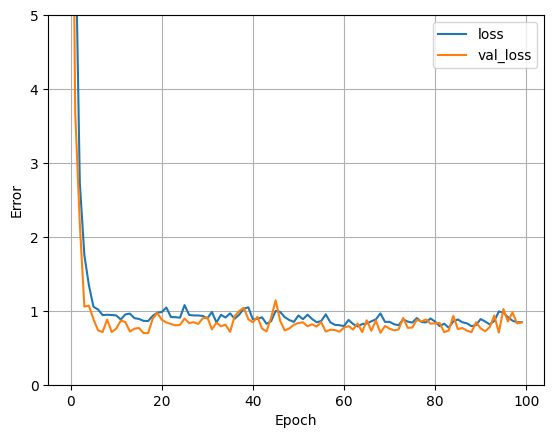

In [141]:
plot_loss(training_history['fourth_model'])

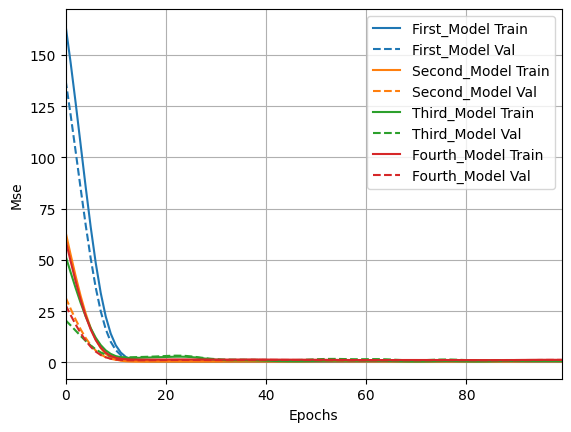

In [142]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [143]:
training_history

{'first_model': <keras.callbacks.History at 0x28ced8a90>,
 'second_model': <keras.callbacks.History at 0x28eab6850>,
 'third_model': <keras.callbacks.History at 0x28f9b89a0>,
 'fourth_model': <keras.callbacks.History at 0x29a620b20>}

In [144]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=2)
print(f'Model MSE: {mse}')

2023-03-24 12:52:38.786256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


83/83 - 1s - loss: 0.8357 - mse: 1.1512 - 653ms/epoch - 8ms/step
Model MSE: 1.1512300968170166


2023-03-24 12:52:39.446768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


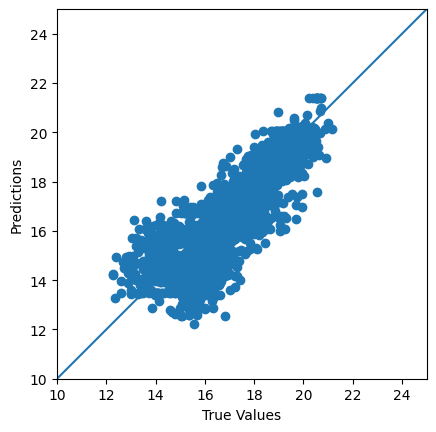

In [145]:
y_pred = model.predict(X_tf_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_tf_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [146]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
%tensorboard --logdir=./my_logs --port=6005

UsageError: Line magic function `%tensorboard` not found.
